In [2]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = load_dataset("mstz/adult",'race')
df

DatasetDict({
    train: Dataset({
        features: ['age', 'capital_gain', 'capital_loss', 'education', 'final_weight', 'hours_worked_per_week', 'marital_status', 'native_country', 'occupation', 'relationship', 'is_male', 'workclass', 'over_threshold', 'race'],
        num_rows: 36631
    })
    test: Dataset({
        features: ['age', 'capital_gain', 'capital_loss', 'education', 'final_weight', 'hours_worked_per_week', 'marital_status', 'native_country', 'occupation', 'relationship', 'is_male', 'workclass', 'over_threshold', 'race'],
        num_rows: 12211
    })
})

In [4]:
df_train = pd.DataFrame()
for c in df['train'].features:
    df_train[c] = df['train'][c]

In [5]:
df_test = pd.DataFrame()
for c in df['test'].features:
    df_test[c] = df['test'][c]

In [6]:
df_train.shape,df_test.shape

((36631, 14), (12211, 14))

In [7]:
df_train.head()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,relationship,is_male,workclass,over_threshold,race
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,Husband,True,Private,0,0
1,23,0.0,0.0,3,244698,35,Never-married,Mexico,Farming-fishing,Other-relative,True,Private,0,0
2,39,0.0,0.0,10,118286,40,Married-civ-spouse,United-States,Sales,Husband,True,Private,0,1
3,35,0.0,0.0,9,126675,46,Divorced,?,Craft-repair,Not-in-family,True,Private,0,0
4,66,0.0,0.0,13,28367,99,Married-civ-spouse,United-States,Priv-house-serv,Other-relative,True,Private,0,0


In [8]:
x_train = df_train
x_test = df_test
x_train.head()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,relationship,is_male,workclass,over_threshold,race
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,Husband,True,Private,0,0
1,23,0.0,0.0,3,244698,35,Never-married,Mexico,Farming-fishing,Other-relative,True,Private,0,0
2,39,0.0,0.0,10,118286,40,Married-civ-spouse,United-States,Sales,Husband,True,Private,0,1
3,35,0.0,0.0,9,126675,46,Divorced,?,Craft-repair,Not-in-family,True,Private,0,0
4,66,0.0,0.0,13,28367,99,Married-civ-spouse,United-States,Priv-house-serv,Other-relative,True,Private,0,0


In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    36631 non-null  int64  
 1   capital_gain           36631 non-null  float64
 2   capital_loss           36631 non-null  float64
 3   education              36631 non-null  int64  
 4   final_weight           36631 non-null  int64  
 5   hours_worked_per_week  36631 non-null  int64  
 6   marital_status         36631 non-null  object 
 7   native_country         36631 non-null  object 
 8   occupation             36631 non-null  object 
 9   relationship           36631 non-null  object 
 10  is_male                36631 non-null  bool   
 11  workclass              36631 non-null  object 
 12  over_threshold         36631 non-null  int64  
 13  race                   36631 non-null  int64  
dtypes: bool(1), float64(2), int64(6), object(5)
memory usa

In [10]:
x_train.isnull().any()

age                      False
capital_gain             False
capital_loss             False
education                False
final_weight             False
hours_worked_per_week    False
marital_status           False
native_country           False
occupation               False
relationship             False
is_male                  False
workclass                False
over_threshold           False
race                     False
dtype: bool

In [11]:
x_train['age'].min()

17

/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

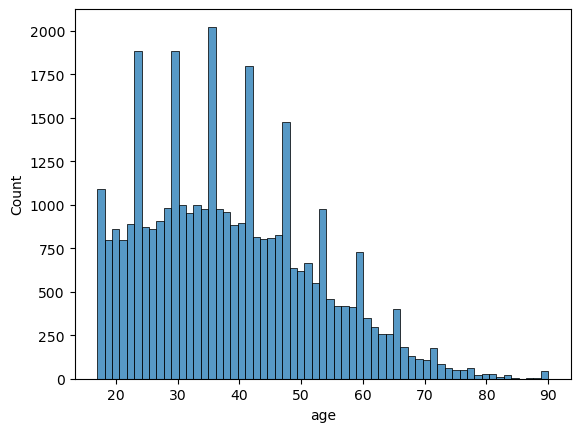

In [12]:
age = x_train['age']
sns.histplot(age)

In [13]:
# Define bin edges for age categories
bin_edges = [17, 26, 34,41,49,58,65,70,float('inf')]

def discretize_encoding(feature,bins):
    # Discretize age into three categories
    discretized_feature = np.digitize(feature, bins=bins, right=False)
    return discretized_feature
# Print the resulting age categories
age_categories = discretize_encoding(age,bin_edges)

/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mircea/anaconda3/envs/ami_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

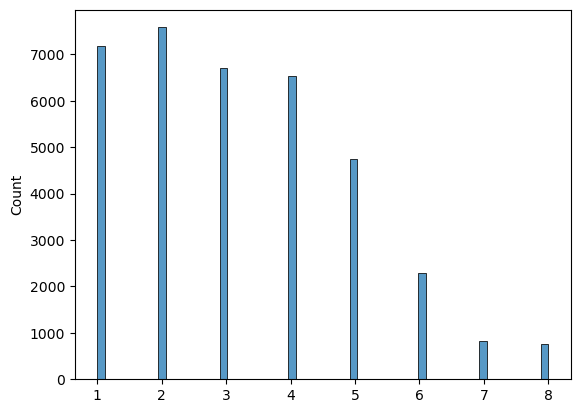

In [14]:
sns.histplot(age_categories)

In [5]:
def label_encoding(feature):
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(feature)
    
    return encoded_labels,np.max(encoded_labels)-np.min(encoded_labels)+1 == feature.unique().shape[0]

binary variables

In [16]:
def map_months(feature):
    month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
    }
    
    feature = feature.map(month_mapping)
    feature = feature.astype('int')
    return feature


In [17]:
x_train.tail()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,relationship,is_male,workclass,over_threshold,race
36626,40,0.0,0.0,10,279679,45,Divorced,United-States,Exec-managerial,Not-in-family,True,Private,0,0
36627,40,0.0,0.0,10,323790,40,Married-civ-spouse,United-States,Other-service,Husband,True,Private,0,0
36628,38,0.0,0.0,10,78247,40,Married-civ-spouse,United-States,Exec-managerial,Husband,True,Private,0,0
36629,53,0.0,0.0,14,92565,40,Married-civ-spouse,United-States,Prof-specialty,Husband,True,Private,1,2
36630,36,4865.0,0.0,9,116608,40,Never-married,United-States,Adm-clerical,Not-in-family,False,Private,0,0


In [24]:
import copy
x_train_encoded = copy.deepcopy(x_train)
x_test_encoded = copy.deepcopy(x_test)

In [25]:
x_train.head()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,relationship,is_male,workclass,over_threshold,race
0,43,0.0,0.0,10,34278,35,Married-civ-spouse,United-States,Sales,Husband,True,Private,0,0
1,23,0.0,0.0,3,244698,35,Never-married,Mexico,Farming-fishing,Other-relative,True,Private,0,0
2,39,0.0,0.0,10,118286,40,Married-civ-spouse,United-States,Sales,Husband,True,Private,0,1
3,35,0.0,0.0,9,126675,46,Divorced,?,Craft-repair,Not-in-family,True,Private,0,0
4,66,0.0,0.0,13,28367,99,Married-civ-spouse,United-States,Priv-house-serv,Other-relative,True,Private,0,0


In [26]:
import warnings
warnings.filterwarnings("ignore")
x_train_encoded['age'] = discretize_encoding(x_train['age'],bin_edges)
x_test_encoded['age'] = discretize_encoding(x_test['age'],bin_edges)
x_train_encoded['marital_status'],check = label_encoding(x_train['marital_status'])
print(check)
x_test_encoded['marital_status'],check = label_encoding(x_test['marital_status'])
print(check)
x_train_encoded['occupation'],check = label_encoding(x_train['occupation'])
print(check)
x_test_encoded['occupation'],check = label_encoding(x_test['occupation'])
print(check)
x_train_encoded['relationship'],check = label_encoding(x_train['relationship'])
print(check)
x_test_encoded['relationship'],check = label_encoding(x_test['relationship'])
print(check)
x_train_encoded['is_male'],check = label_encoding(x_train['is_male'])
print(check)
x_test_encoded['is_male'],check = label_encoding(x_test['is_male'])
print(check)
x_train_encoded['workclass'],check = label_encoding(x_train['workclass'])
print(check)
x_test_encoded['workclass'],check = label_encoding(x_test['workclass'])
print(check)
x_train_encoded['native_country'],check = label_encoding(x_train['native_country'])
print(check)
x_test_encoded['native_country'],check = label_encoding(x_test['native_country'])
print(check)


True
True
True
True
True
True
True
True
True
True
True
True


In [27]:
x_train_encoded.tail()

,age,capital_gain,capital_loss,education,final_weight,hours_worked_per_week,marital_status,native_country,occupation,relationship,is_male,workclass,over_threshold,race
36626,3,0.0,0.0,10,279679,45,0,39,4,1,1,4,0,0
36627,3,0.0,0.0,10,323790,40,2,39,8,0,1,4,0,0
36628,3,0.0,0.0,10,78247,40,2,39,4,0,1,4,0,0
36629,5,0.0,0.0,14,92565,40,2,39,10,0,1,4,1,2
36630,3,4865.0,0.0,9,116608,40,4,39,1,1,0,4,0,0


In [28]:
from sklearn.model_selection import train_test_split
df_test, df_val = train_test_split(x_test_encoded, test_size=0.4, random_state=42)

In [29]:
df_test.shape,df_val.shape

((7326, 14), (4885, 14))

In [24]:
x_train_encoded.to_csv('new_train.csv', index=False)
df_test.to_csv('new_test.csv', index=False)
df_val.to_csv('new_val.csv', index=False)

NameError: name 'x_train_encoded' is not defined

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
apple = pd.read_csv('HistoricalQuotes.csv')


In [8]:
apple.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [9]:
apple.info(),apple.head(),apple.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


(None,
          Date  Close/Last     Volume      Open      High       Low
 0  02/28/2020     $273.36  106721200   $257.26   $278.41   $256.37
 1  02/27/2020     $273.52   80151380    $281.1      $286   $272.96
 2  02/26/2020     $292.65   49678430   $286.53   $297.88    $286.5
 3  02/25/2020     $288.08   57668360   $300.95   $302.53   $286.13
 4  02/24/2020     $298.18   55548830   $297.26   $304.18   $289.23,
             Date  Close/Last     Volume       Open       High        Low
 2513  03/05/2010    $31.2786  224647427   $30.7057   $31.3857   $30.6614
 2514  03/04/2010    $30.1014   89591907   $29.8971   $30.1314   $29.8043
 2515  03/03/2010    $29.9043   92846488   $29.8486   $29.9814   $29.7057
 2516  03/02/2010    $29.8357  141486282     $29.99   $30.1186   $29.6771
 2517  03/01/2010    $29.8557  137312041   $29.3928   $29.9286     $29.35)

In [10]:
apple[' Close/Last'] = apple[' Close/Last'].str.replace('$','')
apple[' Open'] = apple[' Open'].str.replace('$','')
apple[' High'] = apple[' High'].str.replace('$','')
apple[' Low'] = apple[' Low'].str.replace('$','')

apple[' Close/Last'] = apple[' Close/Last'].astype('float')
apple[' Open'] = apple[' Open'].astype('float')
apple[' High'] = apple[' High'].astype('float')
apple[' Low'] = apple[' Low'].astype('float')

In [11]:
from datetime import datetime
import calendar
import time
import datetime
def convert_date_to_unix_timestamp(date):
    timestamp = time.mktime(datetime.datetime.strptime(date, "%m/%d/%Y").timetuple())
    return int(timestamp)
convert_date_to_unix_timestamp('1/2/2019')

1546380000

In [12]:
date_column = apple['Date'].apply(lambda x: convert_date_to_unix_timestamp(x))
date_column == sorted(date_column,reverse=True)
apple['Date'] = date_column
apple.sort_values(by='Date',inplace=True)
apple.rename(columns={' Close/Last':'close',' Open':'open',' High':'high',' Low':'low','Date':'date'},inplace=True)

apple.drop(columns=['date'],inplace=True)
apple.head()

,close,Volume,open,high,low
2517,29.8557,137312041,29.3928,29.9286,29.3500
2516,29.8357,141486282,29.9900,30.1186,29.6771
2515,29.9043,92846488,29.8486,29.9814,29.7057
2514,30.1014,89591907,29.8971,30.1314,29.8043
2513,31.2786,224647427,30.7057,31.3857,30.6614


In [17]:
apple_train = apple[:int(.8*apple.shape[0])]
apple_val = apple[int(.8*apple.shape[0]):int(.9*apple.shape[0])]
apple_test = apple[int(.9*apple.shape[0]):]
apple_test.shape,apple_val.shape,apple_train.shape,apple.shape

((252, 5), (252, 5), (2014, 5), (2518, 5))

In [18]:
apple_train.to_csv('apple_train.csv', index=False)
apple_test.to_csv('apple_test.csv', index=False)
apple_val.to_csv('apple_val.csv', index=False)  

In [8]:
import pandas as pd
import numpy as np

airline_prices = pd.read_csv('/home/mircea/AMI/Proiect/archive (1)/Clean_Dataset.csv')
airline_prices.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
airline_prices.drop(columns=['Unnamed: 0','flight'],inplace=True)

In [10]:
airline_prices['airline'].unique(),airline_prices['source_city'].unique(),airline_prices['stops'].unique(),airline_prices['destination_city'].unique()

(array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
        'Air_India'], dtype=object),
 array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
       dtype=object),
 array(['zero', 'one', 'two_or_more'], dtype=object),
 array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
       dtype=object))

In [11]:
import warnings
warnings.filterwarnings("ignore")
airline_prices['source_city'],check = label_encoding(airline_prices['source_city'])
print(check)
airline_prices['destination_city'],check = label_encoding(airline_prices['destination_city'])
print(check)
airline_prices['airline'],check = label_encoding(airline_prices['airline'])
print(check)
airline_prices['stops'],check = label_encoding(airline_prices['stops'])
print(check)
airline_prices['departure_time'],check = label_encoding(airline_prices['departure_time'])
print(check)
airline_prices['arrival_time'],check = label_encoding(airline_prices['arrival_time'])   
print(check)
airline_prices['class'],check = label_encoding(airline_prices['class'])
print(check)

True
True
True
True
True
True
True


In [12]:
airline_prices.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [13]:
airline_train = airline_prices[:int(.7*airline_prices.shape[0])]
airline_val = airline_prices[int(.7*airline_prices.shape[0]):int(.85*airline_prices.shape[0])]
airline_test = airline_prices[int(.85*airline_prices.shape[0]):]
airline_train.shape,airline_val.shape,airline_test.shape,airline_prices.shape

((210107, 10), (45023, 10), (45023, 10), (300153, 10))

In [ ]:
airline_train.to_csv('airline_train.csv', index=False)
airline_test.to_csv('airline_test.csv', index=False)
airline_val.to_csv('airline_val.csv', index=False)